In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame (study_results)

combined_df = pd.merge(mouse_df, study_df, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID.
combined_df.loc[combined_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df["Mouse ID"]!= "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(cleaned_df["Mouse ID"].unique())
num_mice

248

## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen = cleaned_df.groupby("Drug Regimen")

tumor_mean = regimen["Tumor Volume (mm3)"].mean()
tumor_median = regimen["Tumor Volume (mm3)"].median()
tumor_var = regimen["Tumor Volume (mm3)"].var()
tumor_std = regimen["Tumor Volume (mm3)"].std()
tumor_sem = regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Median": tumor_median, "Tumor Volume Variance": tumor_var, "Tumor Volume Standard Deviation": tumor_std, "Tumor Volume SEM": tumor_sem})
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
regimen.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Find total number of measurements for each regimen
regimen_measurements = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

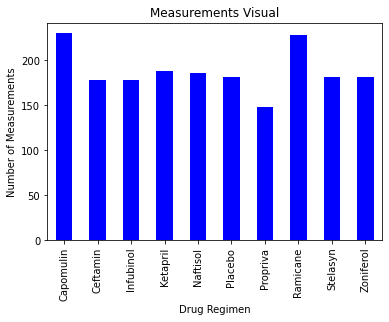

<Figure size 432x288 with 0 Axes>

In [59]:
#Create bar plot
regimen_measurements.plot.bar(color="b")
plt.title("Measurements Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()
plt.tight_layout()

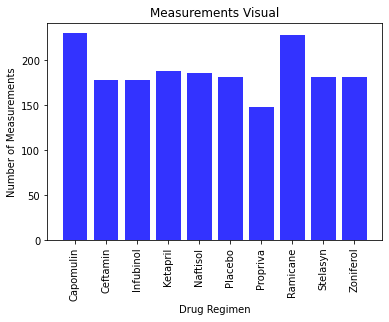

In [61]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = regimen_measurements.index.values
y_axis = regimen_measurements.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Measurements Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation="vertical")

plt.show()

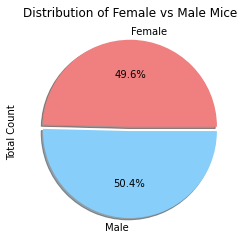

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by sex and calculate percentages
sex = cleaned_df.groupby("Sex")
unique_ID = sex["Mouse ID"].nunique()
percent_sex = (unique_ID / num_mice)*100

#Create pie plot
percent_sex.plot.pie(colors = ["lightcoral", "lightskyblue"], explode = (0.05,0),shadow = True, autopct= "%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Total Count")
plt.show()

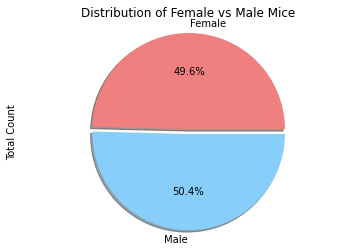

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie plot
sizes = percent_sex

#Set colors for each section of the pie
colors = ["lightcoral", "lightskyblue"]

#Determine circle detachment
explode = (0.05, 0)

#Create the pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

#Set equal axis
plt.axis("equal")

#Name pie plot
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Total Count")
plt.show()


## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_regimens_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin"), :]
four_regimens_last = four_regimens_df.groupby('Mouse ID').max()['Timepoint']
four_regimens_vol = pd.DataFrame(four_regimens_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_merged = pd.merge(four_regimens_vol, cleaned_df, on=("Mouse ID", "Timepoint"), how="left").rename(columns={"Timepoint": "Last Timepoint"})
four_merged


,Mouse ID,Last Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug
for regimen in regimens:
    reg_df = merged_df.loc[merged_df["Drug Regimen"] == regimen]
    
    # Add subset
    last_time_df = reg_df.loc[reg_df["Timepoint"] == reg_df["Last Timepoint"]]
 
    # Get the tumor volumes
    values = last_time_df['Tumor Volume (mm3)']
    vol_values.append(values)
  
    # Calculate IQR for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lquart = quartiles[0.25]
    uquart = quartiles[0.75]
    iqr = uquart-lquart
    print(f'IQR for {regimen}: {iqr}')

    # Find upper and lower bounds
    lbound = lquart - (1.5*iqr)
    ubound = uquart + (1.5*iqr)
    print(f'Lower Bound for {regimen}: {lbound}')
    print(f'Upper Bound for {regimen}: {ubound}')
    
    # Quantitatively check for outliers
    outlier_count = (values.loc[(last_time_df['Tumor Volume (mm3)'] >= ubound)|(last_time_df['Tumor Volume (mm3)'] <= lbound)]).count()
    print(f'Number of {regimen} outliers: {outlier_count}')

    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
